# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

### Подключение библиотек

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

### Работа с датасетами

In [3]:
#Откроем 3 датасета
data_1 = pd.read_csv('/datasets/geo_data_0.csv')
data_2 = pd.read_csv('/datasets/geo_data_1.csv')
data_3 = pd.read_csv('/datasets/geo_data_2.csv')

In [9]:
#Отобразим первые 5 строк каждого датасета
print('Датасет 0:' '\n', data_1.head(5))
print('Датасет 1:' '\n', data_2.head(5))
print('Датасет 2:' '\n', data_3.head(5))

Датасет 0:
       id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
Датасет 1:
       id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
Датасет 2:
       id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


In [10]:
#Просмотрим общую информации о каждом датасете
print('Общая информация о Датасете 0:\n')
data_1.info()

print('\nОбщая информация о Датасете 1:\n')
data_2.info()

print('\nОбщая информация о Датасете 2:\n')
data_3.info()

Общая информация о Датасете 0:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Общая информация о Датасете 1:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB

Общая информация о Датасете 2:

<class 'pandas.core.frame.DataFram

### Проведение проверки на дубликаты в данных

In [22]:
print('Дубликаты в Датасет 0:', data_1.duplicated().sum())

Дубликаты в Датасет 0:
 0


In [16]:
print('Дубликаты в Датасет 1:', data_2.duplicated().sum())

Дубликаты в Датасет 1: 0


In [15]:
print('Дубликаты в Датасет 2:', data_3.duplicated().sum())

Дубликаты в Датасет 2: 0


### Просмотр информации по значениям

#### Датасет 0

In [24]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


#### Датасет 1

In [18]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


#### Датасет 2

In [19]:
data_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


### Работа с полученными данными

In [25]:
#В данных отсутсвуют пропуски -  удалим из каждого датафрейма столбец id, так как он не несет значимости для модели
data_1 = data_1.drop(['id'], axis=1)
data_2 = data_2.drop(['id'], axis=1)
data_3 = data_3.drop(['id'], axis=1)

In [40]:
# Построим гистограммы по столбцу product датасета 0, 1, 2
def hist(seria, bins, xlim_max, ylim_max):
    plt.figure(figsize=[12,9])
    
    plt.hist(seria, bins=bins, color = 'green')

    plt.xlim([0,xlim_max])
    plt.ylim([0,ylim_max])

    plt.xlabel("Объем нефти на скважину, тыс. баррелей")
    plt.ylabel("Количество скважин")

    plt.title("Гистограмма распределения по объему скважин")
    plt.show()

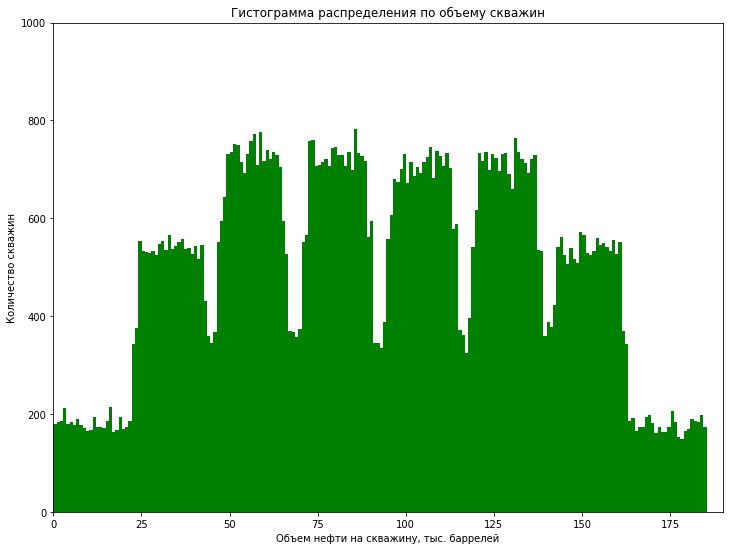

In [37]:
hist(data_1['product'], 200, 190, 1000)

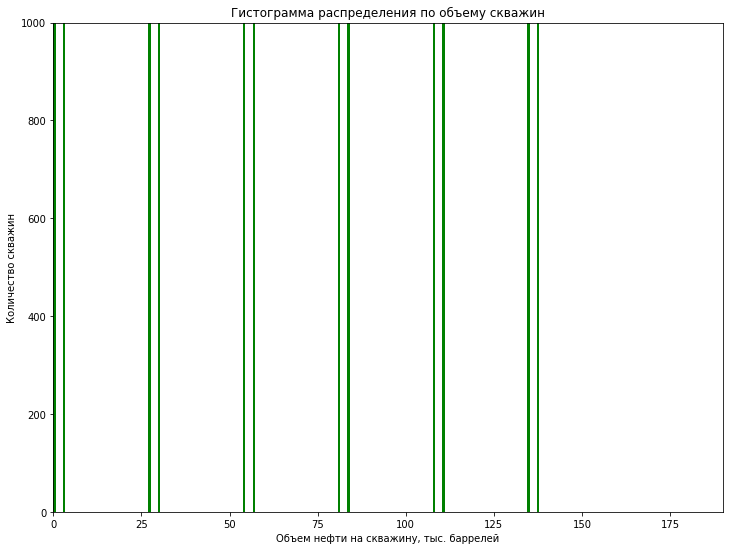

In [38]:
hist(data_2['product'], 200, 190, 1000)

*На графике видно что в data_2 довольно много пропусков, необходимо выяснить сколько именно, напишем для этого функцию*

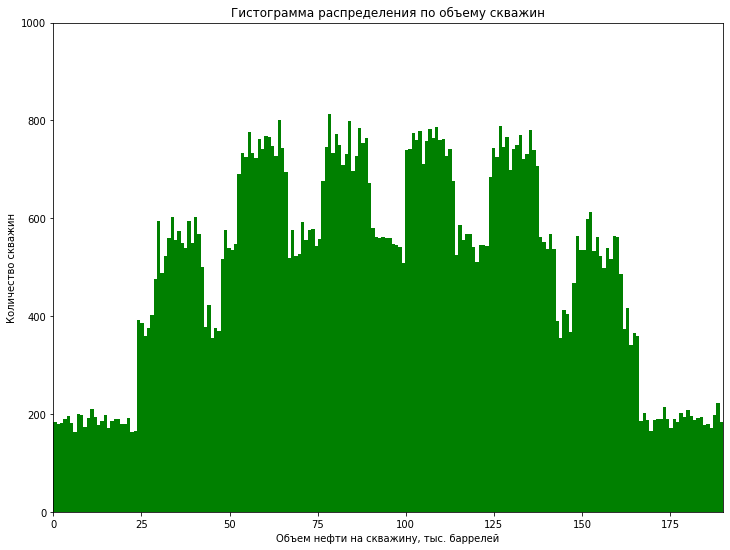

In [39]:
hist(data_3['product'], 200, 190, 1000)

### Разбор пропусков в данных

In [46]:
def zeros_data(data, target_name):
    zeros = data[data[target_name] == 0][target_name].count()
    percent = zeros / data.shape[0]
    print('Количество нулевых значений:', zeros)
    print('Процент нулевых значений:', percent)

In [47]:
zeros_data(data_1, 'product')

Количество нулевых значений: 1
Процент нулевых значений: 1e-05


In [48]:
zeros_data(data_2, 'product')

Количество нулевых значений: 8235
Процент нулевых значений: 0.08235


In [49]:
zeros_data(data_3, 'product')

Количество нулевых значений: 1
Процент нулевых значений: 1e-05


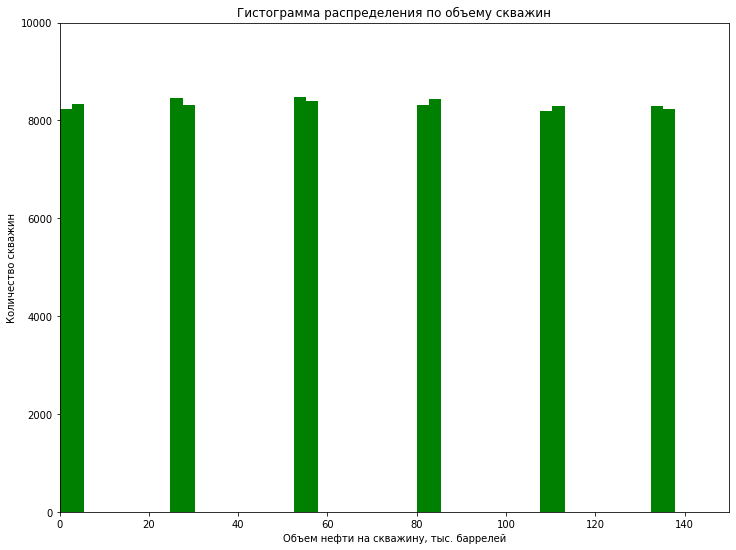

In [50]:
#Рассмотрим ближе гистограмму датафрейма 2 
hist(data_2['product'], 50, 150, 10000)

**Вывод:**

- Загружено 3 датасета с данными. 
- В каждом датасете 10000 строк и 5 столбцов. Все строки без нулевых значений. 
- Столбец ID - это уникальны номер мтроки и для дальнейшей работы не нужен. 
- Столбцы f0, f1, f2 - это признаки, они представлены как отрицательными значениями, так и положительными. 
- Столцец product - это целевой признак и отображает объём запасов в скважине (тыс. баррелей).
- Во втором датафрейме около 8,2% месторождений не имело значения в столбце product. При сравнении с такими же значениями из первого и третьего датафрейма можно понять, что были утеряны данные или не они не были исследованы.
- По гистограммам можно понять, что у первого и третьего фрейма распределение скважин близкое к нормальному. Во втором датафрейме данные имеют странное распределение: от 0 до 5 баррелей с шагом по 15-20 равномерно распределены 100000 значений.Данные не подчиняются закону больших чисел и скорей всего были введены искуственно.

## Обучение и проверка модели

In [91]:
#Функция для разбивки фрейма на выборки
def test_split(data, target):
    features = data.drop([target] , axis=1)
    target = data[target]

    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1234)
    
    return features_train, features_valid, target_train, target_valid

In [93]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(data_1, 'product')

features_train_1.head()

,f0,f1,f2
39682,1.170455,-0.462957,-3.313383
87490,-0.776847,0.754405,2.779678
12337,-0.907117,0.754509,1.398122
9307,-0.720365,0.665569,5.240327
79863,0.937117,0.205242,3.258692


In [95]:
#Функция для разбивки фрейма на масщтабируемой выборки
def test_split_scaled(data, numeric, target):
    geo_data_s = data.copy()

    features_s = geo_data_s.drop([target] , axis=1)
    target_s = geo_data_s[target]

    features_train_s, features_valid_s, target_train_s, target_valid_s = train_test_split(
        features_s, target_s, test_size=0.25, random_state=1515)

    scaler = StandardScaler()
    scaler.fit(features_train_s[numeric])
    features_train_s[numeric] = scaler.transform(features_train_s[numeric])
    features_valid_s[numeric] = scaler.transform(features_valid_s[numeric])

    return features_train_s, features_valid_s, target_train_s, target_valid_s

### Обучение и проверка модели типа линейная регрессия для Датасета 0

In [99]:
# Обучение модели на неизмененных данных и выведем среднеквадратичную ошибку
model = LinearRegression()

model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE:', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE: 37.562394183637785


In [100]:
# Обучение модели на маштабированных данных и выведем среднеквадратичную ошибку
features_train_1s, features_valid_1s, target_train_1s, target_valid_1s = test_split_scaled(
                                                                        data_1, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_1s, target_train_1s)
predicted_target_1s = model.predict(features_valid_1s)
print('RMSE:', mean_squared_error(target_valid_1s, predicted_target_1s)**0.5)

RMSE: 37.54514842848321


### Обучение и проверка модели типа линейная регрессия для Датасета 1

In [103]:
# Аналогично
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(data_2, 'product')
model.fit(features_train_2, target_train_2)
predicted_target_2 = model.predict(features_valid_2)
print('RMSE:', mean_squared_error(target_valid_2, predicted_target_2)**0.5)

features_train_2s, features_valid_2s, target_train_2s, target_valid_2s = test_split_scaled(
                                                                        data_2, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_2s, target_train_2s)
predicted_target_2s = model.predict(features_valid_2s)
print('RMSE', mean_squared_error(target_valid_2s, predicted_target_2s)**0.5)

RMSE: 0.8939344738117703
RMSE: 0.887992303075714


### Обучение и проверка модели типа линейная регрессия для Датасета 2

In [105]:
#Аналогично
features_train_3, features_valid_3, target_train_3, target_valid_3 = test_split(data_3, 'product')
model.fit(features_train_3, target_train_3)
predicted_target_3 = model.predict(features_valid_3)
print('RMSE:', mean_squared_error(target_valid_3, predicted_target_3)**0.5)

features_train_3s, features_valid_3s, target_train_3s, target_valid_3s = test_split_scaled(
                                                                        data_3, ['f0', 'f1', 'f2'], 'product')
model.fit(features_train_3s, target_train_3s)
predicted_target_3s = model.predict(features_valid_3s)
print('RMSE:', mean_squared_error(target_valid_3s, predicted_target_3s)**0.5)

RMSE: 40.10318099258418
RMSE: 40.12893608416936


**Вывод:**


Масштабирование данных не требуется. Проверим показатель RMSE при других гиперпараметрах модели.

### Проверка RMSE на других параметрах

In [106]:
model = LinearRegression(normalize=True)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE:', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE: 37.562394183637785


In [107]:
model = LinearRegression(fit_intercept=False)
model.fit(features_train_1, target_train_1)
predicted_target_1 = model.predict(features_valid_1)
print('RMSE:', mean_squared_error(target_valid_1, predicted_target_1)**0.5)

RMSE: 60.75523913028553


**Вывод:**

Изменение стандартных значений гиперпараметров не улучшило модель.

### Вывод предсказанного запаса

In [108]:
# Произведем вывод предсказанного запаса с реальным и выведем RMSE. Для этого напишем функцию.
model = LinearRegression()

def predict(df, target_name):
    features = df.drop([target_name] , axis=1)
    target = df[target_name]
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=1515)
    
    model.fit(features_train, target_train)
    predicted_target = model.predict(features_valid)
    data = {'real_product' : target_valid,
            'predicted_product' : predicted_target         
    }
    data_frame = pd.DataFrame(data, columns = ['real_product', 'predicted_product'])
    rmse = mean_squared_error(target_valid, predicted_target)**0.5
    mean = data_frame['predicted_product'].mean()
    oil_sum = data_frame['predicted_product'].sum()
    return data_frame, rmse, mean, oil_sum

In [112]:
data_1_predicted, data_1_rmse, data_1_predicted_mean, data_1_predicted_sum = predict(data_1, 'product')
print('RMSE:', data_1_rmse)
print('Средний запас запасанного сырья:', data_1_predicted_mean)

RMSE: 37.54514842848321
Средний запас запасанного сырья: 92.67301020506795


In [115]:
data_2_predicted, data_2_rmse, data_2_predicted_mean, data_2_predicted_sum = predict(data_2, 'product')
print('RMSE:', data_2_rmse)
print('Средний запас запасанного сырья:', data_2_predicted_mean)

RMSE: 0.8879923030757141
Средний запас запасанного сырья: 68.40182262737245


In [116]:
data_3_predicted, data_3_rmse, data_3_predicted_mean, data_3_predicted_sum = predict(data_3, 'product')
print(data_3_predicted.head())
print('RMSE:', data_3_rmse)
print('Средний запас запасанного сырья:', data_3_predicted_mean)

       real_product  predicted_product
24747    125.651756         124.610388
84733    137.961076         101.130654
59479     39.246669          80.389548
74427      8.503397          62.354405
60722     80.540259         104.481677
RMSE: 40.12893608416937
Средний запас запасанного сырья: 95.07347680345853


In [117]:
# Оценим общий запас на регион по предсказанным данным
print('Суммарный предсказанный запас в позиции 0:', data_1_predicted_sum)
print('Суммарный реальный запас в позиции 0:', data_1_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 1:', data_2_predicted_sum)
print('Суммарный реальный запас в позиции 1:', data_2_predicted['real_product'].sum())
print()
print('Суммарный предсказанный запас в позиции 2:', data_3_predicted_sum)
print('Суммарный реальный запас в позиции 2:', data_3_predicted['real_product'].sum())

Суммарный предсказанный запас в позиции 0: 2316825.255126699
Суммарный реальный запас в позиции 0: 2316402.9055410437

Суммарный предсказанный запас в позиции 1: 1710045.5656843113
Суммарный реальный запас в позиции 1: 1710383.3136954207

Суммарный предсказанный запас в позиции 2: 2376836.9200864634
Суммарный реальный запас в позиции 2: 2382895.492237772


**Вывод:**

Запасы сырья и их RMSE распределились следующим образом:

- Датасет 0: RMSE: 37.54514842848321, средний запаc сырья: 92.67301020506795 тыс. баррелей
- Датасет 1: RMSE: 0.8879923030757141, средний запаc сырья: 68.40182262737245 тыс. баррелей
- Датасет 2: RMSE: 40.12893608416937, средний запаc сырья: 95.07347680345853 тыс. баррелей

Из полученных данных видно, что самый большой запас нефти находится в Датасете 2, потом Датасете 0 и самый маленький запас нефти в Датасете 1. 
Относительно RMSE самая низкая квадратичная ошибка в Датасете 1 и составляет 0.887, тогда как в Датасете 0 и Датасете 2 она гораздо выше и сотавляет 37.545 и 40.128.

- Данные предсказаний о количестве нефти по сумме примерно совпадают по сумме с предсказанными значениями. Лучше всего модель предсказала запасы во втором фрейме (RMSE - 0.88), далее в первом и третьем соотвественно.
- Возможно утеряные данные из второго фрейма сказались на модели и она достаточно сильно переобучилась.Но из-за утери данных и малого запаса в среднем не имеет смысла рассматривать второй фрейм как прибыльное месторождение.
- Изучим все фреймы на риски и прибыль, но в конечном итоге будем выбирать между 1 и 3 фреймом.

## Подготовка к расчёту прибыли

### Подготовка ключвых значений для расчетов

In [118]:
#Все ключевые значения для расчётов сохраним в отдельных переменных.
chosen_points = 500 #При разведке региона исследуют 500 точек
best_points = 200 #с помощью машинного обучения выбирают 200 лучших для разработки.
budget = 10000000000 #Бюджет на разработку скважин в регионе
price_per_barrel = 450000 #Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [120]:
average_profit_per_point = budget / best_points
print('Средняя прибыль на лучшую точку:', average_profit_per_point, 'тыс.руб.')

average_barrels_per_point = average_profit_per_point  / price_per_barrel
print('Средний объем нефти на точку:',average_barrels_per_point, 'тыс. баррелей')

average_barrels = budget / price_per_barrel
print('Средний объем нефти на регион:',average_barrels, 'тыс. баррелей')

Средняя прибыль на лучшую точку: 50000000.0 тыс.руб.
Средний объем нефти на точку: 111.11111111111111 тыс. баррелей
Средний объем нефти на регион: 22222.222222222223 тыс. баррелей


### Рассмотрит фактические запасы сырья

In [122]:
# Фактические запасы
print('Средний запас фактичекой нефти на скважину в 1:', data_1['product'].mean())
print('Средний запас фактичекой нефти на скважину в 2:', data_2['product'].mean())
print('Средний запас фактичекой нефти на скважину в 3:', data_3['product'].mean())

Средний запас фактичекой нефти на скважину в 1: 92.50000000000001
Средний запас фактичекой нефти на скважину в 2: 68.82500000000002
Средний запас фактичекой нефти на скважину в 3: 95.00000000000004


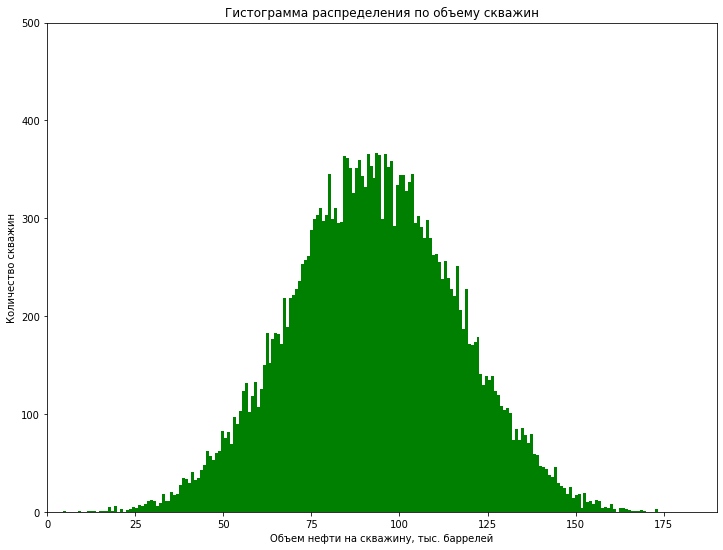

In [123]:
hist(data_1_predicted['predicted_product'], 200, 190, 500)

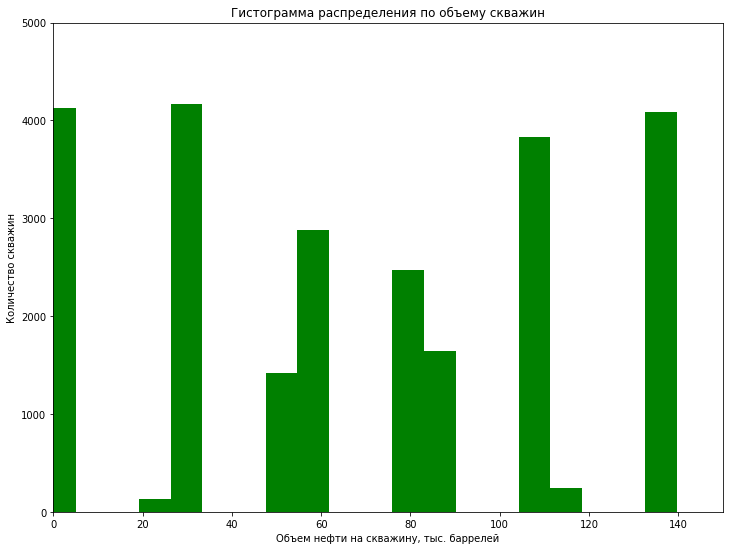

In [124]:
hist(data_2_predicted['predicted_product'], 20, 150, 5000)

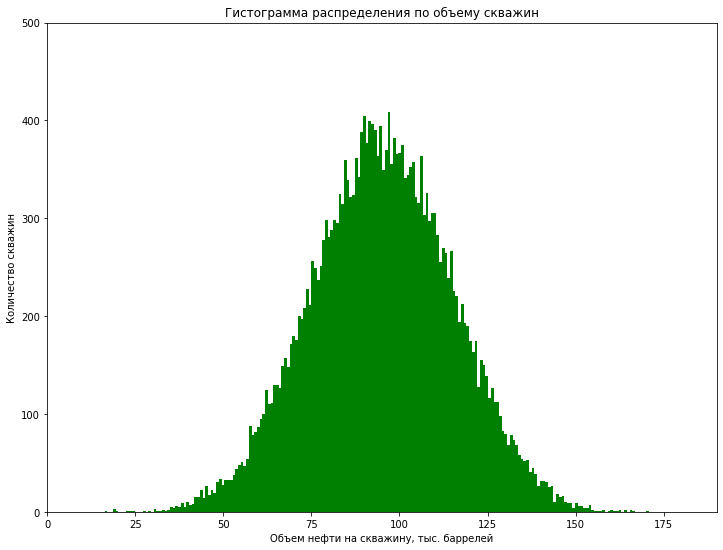

In [125]:
hist(data_3_predicted['predicted_product'], 200, 190, 500)

**Вывод:**

- Для безубыточной разработки 1 точки потребуется 111.1 тыс. баррелей нефти. 
- Это значение больше, чем средний запас нефти в каждом из датасетов. На 13-15 % больше, чем средний запас в Датасете 0 и Датасете 2 и на 38% больше, чем в Датасете 1.


    Также выведен фактический запас нефти:
- Средний запас фактичекой нефти на скважину в 1 92.50000000000001
- Средний запас фактичекой нефти на скважину в 2 68.82500000000002
- Средний запас фактичекой нефти на скважину в 3 95.00000000000004


Изучены средние фактические запасы. Для первого и третьего - высокая вероятность окупить затраты. Разброс значений вокруг среднего 92.5 и 95 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

Во вторых данных возможно и есть определенный смысл - значений больше 111 достаточно много и при определенной доли везения можно выбрать только лучшие в этой выборке, хотя и среднее значение 68.8.

## Расчёт прибыли и рисков 

In [126]:
# Функция для расчета прибыли на 500 разведанных точек.
def oil_profit_calculation(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price_per_barrel * selected.sum() - budget

In [127]:
# Функция для применения техники Bootstrap с 1000 выборокам
state = np.random.RandomState(1515)
def bootstrap_1000(target, probs):
    values=[]
    lost = 0
    for i in range(1000):
        target_sample = target.sample(replace=True, random_state=state, n=chosen_points)
        probs_sample = probs[target_sample.index]
        profit = oil_profit_calculation(target, probs_sample, best_points)
        if profit < 0:
            lost +=1
        values.append(profit)
    
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

### Расчет прибыли и рисков для датасета 0

In [147]:
average_1, lower_1, upper_1, risk_1 = bootstrap_1000(data_1_predicted['real_product'], 
                                                     data_1_predicted['predicted_product'])
print('Данные по первому региону.')
print('Средняя прибыль по региону: {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска: {:.2%}'.format(risk_1))

Данные по первому региону.
Средняя прибыль по региону: 449038746.26 тыс.руб.
95% доверительный интервал от -75256911.08 до 962718549.45 тыс.руб.
Процент риска: 4.50%


### Расчет прибыли и рисков для датасета 1

In [136]:
average_2, lower_2, upper_2, risk_2 = bootstrap_1000(data_2_predicted['real_product'], 
                                                     data_2_predicted['predicted_product'])
print('Данные по второму региону.')
print('Средняя прибыль по региону: {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска: {:.2%}'.format(risk_2))

Данные по второму региону.
Средняя прибыль по региону: 405497664.98 тыс.руб.
95% доверительный интервал от 38857140.89 до 796710792.96 тыс.руб.
Процент риска: 1.40%


### Расчет прибыли и рисков для датасета 2

In [137]:
average_3, lower_3, upper_3, risk_3 = bootstrap_1000(data_3_predicted['real_product'], 
                                                     data_3_predicted['predicted_product'])
print('Данные по третьему региону.')
print('Средняя прибыль по региону: {:.2f} тыс.руб.'.format(average_3))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_3, upper_3))
print('Процент риска: {:.2%}'.format(risk_3))

Данные по третьему региону.
Средняя прибыль по региону: 387025831.58 тыс.руб.
95% доверительный интервал от -141490855.54 до 908324762.10 тыс.руб.
Процент риска: 7.80%


**Вывод:**

Мы отсеиваем первый и третий регион, так как риски относительно велики (4.5% и 7.8%). 

Остается один единственный - второй, чей риск равен требуему (1.4%). Кроме того доверительный интервал показывает, что даже при не очень удачном выборе разработка скважин окупится.

## Вывод

По итогу получили следующие данные для регионов:

- Датасет 0:

        - Средняя прибыль по региону: 445884814.93 тыс.руб.
        - 95% доверительный интервал от -69113643.14 до 915778306.38 тыс.руб.
        - Процент риска: 4.50%

- Датасет 1:

        - Средняя прибыль по региону: 405497664.98 тыс.руб.
        - 95% доверительный интервал от 38857140.89 до 796710792.96 тыс.руб.
        - Процент риска: 1.40%
        
- Датасет 2:

        - Средняя прибыль по региону: 387025831.58 тыс.руб.
        - 95% доверительный интервал от -141490855.54 до 908324762.10 тыс.руб.
        - Процент риска: 7.80%
        
Согласно полученным данным, видим, что выручка во 1 и 3 датасетах может быть отрицательной - они могут не подойти для далейшней разработки. 
Второй регион получился одним из лучших по показателям предсказывания, хотя данные не выглядят нормально распределенными, что неожиданно.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [ ]  Выбор региона обоснован